## Capstone Project The Battle of Neighborhoods (Week 4)

In [3]:
# proposition theme
!pip install geopy
!conda install -c conda-forge folium=0.5.0 --yes 

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
%matplotlib inline 
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # optional: for ggplot-like style

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print('Libraries imported.')

Solving environment: - 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::anaconda==5.3.1=py37_0
  - defaults/linux-64::astropy==3.0.4=py37h14c3975_0
  - defaults/linux-64::bkcharts==0.2=py37_0
  - defaults/linux-64::blaze==0.11.3=py37_0
  - defaults/linux-64::bokeh==0.13.0=py37_0
  - defaults/linux-64::bottleneck==1.2.1=py37h035aef0_1
  - defaults/linux-64::dask==0.19.1=py37_0
  - defaults/linux-64::datashape==0.5.4=py37_1
  - defaults/linux-64::mkl-service==1.1.2=py37h90e4bf4_5
  - defaults/linux-64::numba==0.39.0=py37h04863e7_0
  - defaults/linux-64::numexpr==2.6.8=py37hd89afb7_0
  - defaults/linux-64::odo==0.5.1=py37_0
  - defaults/linux-64::pytables==3.4.4=py37ha205bf6_0
  - defaults/linux-64::pytest-arraydiff==0.2=py37h39e3cac_0
  - defaults/linux-64::pytest-astropy==0.4.0=py37_0
  - defaults/linux-64::pytest-doctestplus==0.1.3=py37_0
  - defaults/linux-64::pywavelets==1.0.0=py37h

Founding the best place when  visiting the capitol of country

### Introduction

<em> Like me and other  a lot of traveler we are looking to visite the best place from area that complet certain criteria like environnement , security, and entertainment.  our approche is according to traveler datas, we would like to suggest the best place to visite in his area or specific area of choose. <em>

### Data
<em>Foursquare data will be exclusivly used for this project</em>

### Data manipulation

### In order to use the resources of Foursquare, I propose to simulate a search for the best situation if I want to visit the capital of a country in the world.
I did a search on google so as not to be biased in the choice of monuments to discover in each capital. my research is therefore: the name of a capital + «tourist places»
I had these results for these four cities : Paris, Washington, Rome, Londres

### Etape 1 : data for Paris

In [4]:
paris_data = pd.read_csv("https://lvdesign.com.fr/coursera_data/paris.csv")
paris_data 

,Lieux,Latitude,Longitude
0,Musée du Louvre,48.860611,2.335450
1,Notre Dame de Paris,48.852968,2.347708
2,Arc de Triomphe,48.873792,2.295028
3,Tour Eiffel,48.858370,2.294481


### Localise Lieux on the map Paris

In [5]:
# Localise Lieux on the map Paris
address = 'Paris, FR'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Paris are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Paris are 48.8566101, 2.3514992.


In [6]:
# create map of Paris using latitude and longitude values
map_Paris = folium.Map(location=[latitude, longitude], zoom_start=14)

# add markers to map
for lat, lng, label in zip(paris_data['Latitude'], paris_data['Longitude'], paris_data['Lieux']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='red',
        fill=True,
        fill_color='black',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Paris)  
    
map_Paris

### Define Foursquare Credentials and Version¶

In [7]:
#Define Foursquare Credentials and Version
CLIENT_ID = 'CRZBNMMVS2ACWMPMW0U45WAMZC3V23XCMTBOZHEQYGTQY5PW' # your Foursquare ID
CLIENT_SECRET = 'RZQYEPUWPZSQCW5WEAIJMCRPUF0XANVKLNRDTAESFDKSMEYN' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version


### Explore all venue's categories in Paris

In [8]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng,            
            v['venue']['name'], 
            v['venue']['id'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Lieux', 
                  'Lieux Latitude', 
                  'Lieux Longitude', 
                  'Venue',
                  'Venue id',                
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category'        
                   ]
    
    return(nearby_venues)

In [9]:
paris_data_venues = getNearbyVenues(names=paris_data['Lieux'],
                                   latitudes=paris_data['Latitude'],
                                   longitudes=paris_data['Longitude']
                                  )

Musée du Louvre
Notre Dame de Paris
Arc de Triomphe
Tour Eiffel


In [10]:
print(paris_data_venues.shape)
paris_data_venues

(344, 8)


,Lieux,Lieux Latitude,Lieux Longitude,Venue,Venue id,Venue Latitude,Venue Longitude,Venue Category
0,Musée du Louvre,48.860611,2.335450,La Vénus de Milo (Vénus de Milo),5864efb745c3ed1e7d88e96d,48.859943,2.337234,Exhibit
1,Musée du Louvre,48.860611,2.335450,Musée du Louvre,4adcda10f964a520af3521e3,48.860847,2.336440,Art Museum
2,Musée du Louvre,48.860611,2.335450,Vestige de la Forteresse du Louvre,4f6dabf5003944083fe0002e,48.861577,2.333508,Historic Site
3,Musée du Louvre,48.860611,2.335450,Cour Carrée du Louvre,4c079d740ed3c928b6be797d,48.860360,2.338543,Pedestrian Plaza
4,Musée du Louvre,48.860611,2.335450,Mona Lisa | La Joconde,56f279c4cd10850a585f5e31,48.860139,2.335337,Exhibit
5,Musée du Louvre,48.860611,2.335450,Place du Palais Royal,4b071505f964a520dcf622e3,48.862523,2.336688,Plaza
6,Musée du Louvre,48.860611,2.335450,Carrousel du Louvre,4adcda1df964a5202e3921e3,48.861642,2.334217,Shopping Mall
7,Musée du Louvre,48.860611,2.335450,"Pavillon des Sessions – Arts d'Afrique, d'Asie...",588ba9a9fc5a5f18a36a2a05,48.860724,2.332121,Art Museum
8,Musée du Louvre,48.860611,2.335450,Mariage Frères,4b9cf29ef964a520318436e3,48.861437,2.334143,Tea Room
9,Musée du Louvre,48.860611,2.335450,Pont des Arts,4adcda09f964a520ff3321e3,48.858565,2.337635,Bridge


In [11]:
# More intersting
#Let's check how many venues were returned for each lieux
paris_data_venues.groupby('Lieux').count()

,Lieux Latitude,Lieux Longitude,Venue,Venue id,Venue Latitude,Venue Longitude,Venue Category
Lieux,,,,,,,
Arc de Triomphe,100,100,100,100,100,100,100
Musée du Louvre,98,98,98,98,98,98,98
Notre Dame de Paris,100,100,100,100,100,100,100
Tour Eiffel,46,46,46,46,46,46,46


In [12]:
df_view = paris_data_venues.groupby('Lieux').count()
df_toto = df_view['Venue Category']
df_toto

Lieux
Arc de Triomphe        100
Musée du Louvre         98
Notre Dame de Paris    100
Tour Eiffel             46
Name: Venue Category, dtype: int64

### Number by Categories at these Lieux

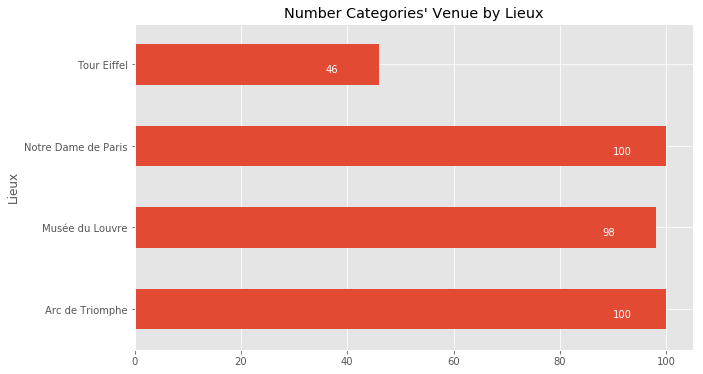

In [14]:
df_toto.plot(kind='barh', figsize=(10,6))

#plt.xlabel('name') # add to x-label to the plot
#plt.ylabel('Number de categories') # add y-label to the plot
plt.title('Number Categories\' Venue by Lieux') # add title to the plot

for index, value in enumerate(df_toto): 
    label = format(int(value), ',') 
    plt.annotate(label, xy=(value - 10, index - 0.10), color='white')
    
plt.show()

### Another Analyses for each venue

In [15]:

# one hot encoding
paris_onehot = pd.get_dummies(paris_data_venues[['Venue Category']], prefix="", prefix_sep="")

# add Lieux column back to dataframe
paris_onehot['Lieux'] = paris_data_venues['Lieux'] 

# move lieux column to the first column
fixed_columns = [paris_onehot.columns[-1]] + list(paris_onehot.columns[:-1])
paris_onehot = paris_onehot[fixed_columns]

paris_onehot.head()

,Lieux,Art Museum,Arts & Crafts Store,Asian Restaurant,Auditorium,Auvergne Restaurant,Bagel Shop,Bakery,Bar,Bistro,Bookstore,Boutique,Brasserie,Breakfast Spot,Breton Restaurant,Bridge,Burger Joint,Café,Candy Store,Cantonese Restaurant,Champagne Bar,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comic Shop,Convenience Store,Cosmetics Shop,Creperie,Deli / Bodega,Dessert Shop,Diner,Electronics Store,Exhibit,Fast Food Restaurant,Flower Shop,Fountain,French Restaurant,Furniture / Home Store,Garden,Gift Shop,Government Building,Gym,Historic Site,History Museum,Hobby Shop,Hotel,Hotel Bar,Ice Cream Shop,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Lebanese Restaurant,Library,Men's Store,Mexican Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Nightclub,Park,Pastry Shop,Pedestrian Plaza,Perfume Shop,Pizza Place,Plaza,Pub,Ramen Restaurant,Restaurant,Romanian Restaurant,Roof Deck,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Smoke Shop,Spa,Sports Bar,Steakhouse,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park Ride / Attraction,Track,Train Station,Udon Restaurant,Vegetarian / Vegan Restaurant,Wine Shop
0,Musée du Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Musée du Louvre,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Musée du Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Musée du Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Musée du Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
# Next, 
# let's group rows by venue
# and by taking the mean of the frequency of occurrence of each category
paris_grouped = paris_onehot.groupby('Lieux').mean().reset_index()
paris_grouped

,Lieux,Art Museum,Arts & Crafts Store,Asian Restaurant,Auditorium,Auvergne Restaurant,Bagel Shop,Bakery,Bar,Bistro,Bookstore,Boutique,Brasserie,Breakfast Spot,Breton Restaurant,Bridge,Burger Joint,Café,Candy Store,Cantonese Restaurant,Champagne Bar,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comic Shop,Convenience Store,Cosmetics Shop,Creperie,Deli / Bodega,Dessert Shop,Diner,Electronics Store,Exhibit,Fast Food Restaurant,Flower Shop,Fountain,French Restaurant,Furniture / Home Store,Garden,Gift Shop,Government Building,Gym,Historic Site,History Museum,Hobby Shop,Hotel,Hotel Bar,Ice Cream Shop,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Lebanese Restaurant,Library,Men's Store,Mexican Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Nightclub,Park,Pastry Shop,Pedestrian Plaza,Perfume Shop,Pizza Place,Plaza,Pub,Ramen Restaurant,Restaurant,Romanian Restaurant,Roof Deck,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Smoke Shop,Spa,Sports Bar,Steakhouse,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park Ride / Attraction,Track,Train Station,Udon Restaurant,Vegetarian / Vegan Restaurant,Wine Shop
0,Arc de Triomphe,0.000000,0.000000,0.02,0.000000,0.00,0.01,0.030000,0.010000,0.010000,0.000000,0.010000,0.010000,0.000000,0.01,0.000000,0.00,0.010000,0.010000,0.01,0.000000,0.00,0.000000,0.00,0.000000,0.020000,0.010000,0.010000,0.01,0.00,0.010000,0.000000,0.00,0.000000,0.000000,0.00,0.01,0.000000,0.01,0.00,0.00,0.150000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.240000,0.01,0.000000,0.01,0.060000,0.030000,0.00,0.04,0.01,0.01,0.000000,0.00,0.000000,0.02,0.00,0.01,0.010000,0.01,0.02,0.000000,0.02,0.000000,0.00,0.000000,0.000000,0.000000,0.010000,0.00,0.000000,0.000000,0.000000,0.01,0.020000,0.02,0.000000,0.000000,0.01,0.000000,0.000000,0.000000,0.020000,0.00,0.01,0.000000,0.000000,0.02,0.000000,0.000000,0.000000,0.000000,0.000000,0.01,0.00
1,Musée du Louvre,0.030612,0.010204,0.00,0.010204,0.00,0.00,0.010204,0.030612,0.020408,0.010204,0.010204,0.000000,0.010204,0.00,0.010204,0.00,0.071429,0.010204,0.00,0.000000,0.00,0.000000,0.00,0.010204,0.010204,0.010204,0.030612,0.00,0.00,0.000000,0.030612,0.00,0.000000,0.020408,0.00,0.00,0.030612,0.00,0.00,0.00,0.163265,0.010204,0.010204,0.000000,0.010204,0.00,0.040816,0.00,0.00,0.071429,0.00,0.010204,0.00,0.010204,0.030612,0.00,0.00,0.00,0.00,0.010204,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.020408,0.00,0.010204,0.00,0.010204,0.010204,0.020408,0.051020,0.00,0.010204,0.000000,0.000000,0.00,0.020408,0.00,0.000000,0.010204,0.00,0.010204,0.010204,0.010204,0.010204,0.00,0.00,0.010204,0.020408,0.00,0.010204,0.000000,0.000000,0.000000,0.010204,0.00,0.00
2,Notre Dame de Paris,0.000000,0.010000,0.01,0.000000,0.01,0.00,0.030000,0.050000,0.020000,0.060000,0.000000,0.000000,0.000000,0.00,0.000000,0.02,0.040000,0.010000,0.01,0.000000,0.01,0.000000,0.01,0.010000,0.000000,0.010000,0.020000,0.00,0.02,0.000000,0.000000,0.04,0.000000,0.010000,0.01,0.00,0.000000,0.00,0.01,0.01,0.140000,0.000000,0.020000,0.000000,0.000000,0.01,0.010000,0.01,0.01,0.050000,0.00,0.030000,0.01,0.000000,0.030000,0.01,0.00,0.01,0.00,0.000000,0.02,0.000000,0.00,0.03,0.00,0.000000,0.01,0.00,0.000000,0.00,0.020000,0.02,0.010000,0.000000,0.010000,0.040000,0.01,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.010000,0.000000,0.02,0.000000,0.000000,0.000000,0.000000,0.01,0.00,0.000000,0.000000,0.00,0.010000,0.000000,0.000000,0.000000,0.000000,0.00,0.01
3,Tour Eiffel,0.021739,0.000000,0.00,0.000000,0.00,0.00,0.065217,0.000000,0.043478,0.000000,0.000000,0.021739,0.000000,0.00,0.000000,0.00,0.043478,0.000000,0.00,0.021739,0.00,0.021739,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.021739,0.000000,0.00,0.021739,0.000000,0.00,0.00,0.000000,0.00,0.00,0.00,0.2

In [17]:
#Let's print each venue along with the top 20 most common venues¶
num_top_venues = 20

for hood in paris_grouped['Lieux']:
    print("----"+hood+"----")
    temp = paris_grouped[paris_grouped['Lieux'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Arc de Triomphe----
                      venue  freq
0                     Hotel  0.24
1         French Restaurant  0.15
2        Italian Restaurant  0.06
3             Jewelry Store  0.04
4                    Bakery  0.03
5       Japanese Restaurant  0.03
6          Asian Restaurant  0.02
7            Sandwich Place  0.02
8             Movie Theater  0.02
9               Men's Store  0.02
10                Nightclub  0.02
11           Clothing Store  0.02
12          Thai Restaurant  0.02
13                      Spa  0.02
14  Scandinavian Restaurant  0.02
15       Seafood Restaurant  0.01
16     Fast Food Restaurant  0.01
17      Moroccan Restaurant  0.01
18        Electronics Store  0.01
19      Indie Movie Theater  0.01


----Musée du Louvre----
                     venue  freq
0        French Restaurant  0.16
1                    Hotel  0.07
2                     Café  0.07
3                    Plaza  0.05
4            Historic Site  0.04
5           Cosmetics Shop  0.03
6    

In [18]:
#Let's put that into a pandas dataframe
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [19]:
#Now let's create the new dataframe 
#and display the top 20 venues for each.
num_top_venues = 20

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Lieux']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
lieux_venues_sorted = pd.DataFrame(columns=columns)
lieux_venues_sorted['Lieux'] = paris_grouped['Lieux']

for ind in np.arange(paris_grouped.shape[0]):
    lieux_venues_sorted.iloc[ind, 1:] = return_most_common_venues(paris_grouped.iloc[ind, :], num_top_venues)

lieux_venues_sorted

,Lieux,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,Arc de Triomphe,Hotel,French Restaurant,Italian Restaurant,Jewelry Store,Bakery,Japanese Restaurant,Movie Theater,Scandinavian Restaurant,Thai Restaurant,Clothing Store,Spa,Nightclub,Men's Store,Asian Restaurant,Sandwich Place,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Cocktail Bar,Electronics Store
1,Musée du Louvre,French Restaurant,Hotel,Café,Plaza,Historic Site,Art Museum,Bar,Japanese Restaurant,Coffee Shop,Cosmetics Shop,Exhibit,Museum,Pizza Place,Sandwich Place,Bistro,Dessert Shop,Tea Room,Shoe Store,Furniture / Home Store,Italian Restaurant
2,Notre Dame de Paris,French Restaurant,Bookstore,Bar,Hotel,Café,Creperie,Plaza,Ice Cream Shop,Japanese Restaurant,Bakery,Mexican Restaurant,Bistro,Lebanese Restaurant,Pastry Shop,Park,Seafood Restaurant,Comic Shop,Garden,Burger Joint,Coffee Shop
3,Tour Eiffel,French Restaurant,Italian Restaurant,Hotel,Bakery,Garden,Bistro,Café,Restaurant,Plaza,Pizza Place,Gift Shop,Chinese Restaurant,Pedestrian Plaza,Monument / Landmark,Library,Convenience Store,Deli / Bodega,Romanian Restaurant,Art Museum,Champagne Bar


In [20]:
# set number of clusters
kclusters = 3

paris_grouped_clustering = paris_grouped.drop('Lieux', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(paris_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 1, 1, 2], dtype=int32)

In [21]:
#Let's create a new dataframe that includes the cluster as well as the top 5 venues for each Lieux.

paris_merged = paris_data

# add clustering labels
paris_merged['Cluster Labels'] = kmeans.labels_

paris_merged = paris_merged.join(lieux_venues_sorted.set_index('Lieux'), on='Lieux')
paris_merged 
# check the last columns!

,Lieux,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,Musée du Louvre,48.860611,2.335450,0,French Restaurant,Hotel,Café,Plaza,Historic Site,Art Museum,Bar,Japanese Restaurant,Coffee Shop,Cosmetics Shop,Exhibit,Museum,Pizza Place,Sandwich Place,Bistro,Dessert Shop,Tea Room,Shoe Store,Furniture / Home Store,Italian Restaurant
1,Notre Dame de Paris,48.852968,2.347708,1,French Restaurant,Bookstore,Bar,Hotel,Café,Creperie,Plaza,Ice Cream Shop,Japanese Restaurant,Bakery,Mexican Restaurant,Bistro,Lebanese Restaurant,Pastry Shop,Park,Seafood Restaurant,Comic Shop,Garden,Burger Joint,Coffee Shop
2,Arc de Triomphe,48.873792,2.295028,1,Hotel,French Restaurant,Italian Restaurant,Jewelry Store,Bakery,Japanese Restaurant,Movie Theater,Scandinavian Restaurant,Thai Restaurant,Clothing Store,Spa,Nightclub,Men's Store,Asian Restaurant,Sandwich Place,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Cocktail Bar,Electronics Store
3,Tour Eiffel,48.858370,2.294481,2,French Restaurant,Italian Restaurant,Hotel,Bakery,Garden,Bistro,Café,Restaurant,Plaza,Pizza Place,Gift Shop,Chinese Restaurant,Pedestrian Plaza,Monument / Landmark,Library,Convenience Store,Deli / Bodega,Romanian Restaurant,Art Museum,Champagne Bar


In [22]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=14)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(paris_merged['Latitude'], paris_merged['Longitude'], paris_merged['Lieux'], paris_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [23]:
# Cluster 0 == Musée du louvre
paris_merged.loc[paris_merged['Cluster Labels'] == 0, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,48.860611,Hotel,Café,Plaza,Historic Site,Art Museum,Bar,Japanese Restaurant,Coffee Shop,Cosmetics Shop,Exhibit,Museum,Pizza Place,Sandwich Place,Bistro,Dessert Shop,Tea Room,Shoe Store,Furniture / Home Store,Italian Restaurant


In [24]:
# Cluster 1 == Arc de triomphe
paris_merged.loc[paris_merged['Cluster Labels'] == 1, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
1,48.852968,Bookstore,Bar,Hotel,Café,Creperie,Plaza,Ice Cream Shop,Japanese Restaurant,Bakery,Mexican Restaurant,Bistro,Lebanese Restaurant,Pastry Shop,Park,Seafood Restaurant,Comic Shop,Garden,Burger Joint,Coffee Shop
2,48.873792,French Restaurant,Italian Restaurant,Jewelry Store,Bakery,Japanese Restaurant,Movie Theater,Scandinavian Restaurant,Thai Restaurant,Clothing Store,Spa,Nightclub,Men's Store,Asian Restaurant,Sandwich Place,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Cocktail Bar,Electronics Store


In [25]:
# Cluster 2 == Tour Eiffel
paris_merged.loc[paris_merged['Cluster Labels'] == 2, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
3,48.85837,Italian Restaurant,Hotel,Bakery,Garden,Bistro,Café,Restaurant,Plaza,Pizza Place,Gift Shop,Chinese Restaurant,Pedestrian Plaza,Monument / Landmark,Library,Convenience Store,Deli / Bodega,Romanian Restaurant,Art Museum,Champagne Bar


### Graphical representations and frames will be added along the lines of my research proposal of the best places to visit a capital. Thanks ;-)